# Predicting Sales Opportunities - Part 1 Pre-Processing
### General Assembly Capstone Project
by Daryl Cheong

# Introduction

Sales is one of the essential components of any business. It involves the act of selling goods or services to an interested party, in exchange for money. This process allows a business to generate revenue, which is why it is so vital for any organisation. Without sales, a business will not be able to grow or even survive.

Due to the importance of sales, this project will examine the sales process of an organisation and seek to achieve the following goals:-

**Goal 1 - Predict the value of sales opportunity ('Amount' column) using regression models**

**Goal 2 - Predict the outcome of sales opportunity ('Result' column) using classification models**

# Data Overview

In this project, we will be looking at the sales database for an auntomotive suppliers wholesaler. This is a sample dataset provided by [IBM Watson Analytics](https://www.ibm.com/communities/analytics/watson-analytics-blog/sales-win-loss-sample-dataset/). The database describes the sales pipeline for every sales opportunity, which covers 3 key stages:-
1. Identified/Qualifying 
2. Qualified/Validating 
3. Validated/Gaining Agreement

This dataset consists of 78,025 rows and 19 columns (9 numerical, 10 categorical). Every record provides information about the client, product and process status. The columns include the following:-
1. **Result** - Outcome of opportunity. **(Goal 2)**
2. **Amount** - Estimated total revenue of opportunities in USD. **(Goal 1)**
3. **Id** - A uniquely generated number assigned to the opportunity.
4. **Supplies** - Category for each supplies group.
5. **Supplies_Sub** - Sub group of each supplies group.
6. **Region** - Name of the region.
7. **Market** - The opportunities’ route to market.
8. **Client_Revenue** - Client size based on annual revenue.
9. **Client_Employee** - Client size by number of employees.
10. **Client_Past** - Revenue identified from this client in the past two years.
11. **Competitor** - An indicator if a competitor has been identified.
12. **Size** - Categorical grouping of the opportunity amount.
13. **Elapsed_Days** - The number of days between the change in sales stages. Each change resets the counter.
14. **Stage_Change** - The number of times an opportunity changes sales stage. Includes backward and forward changes.
15. **Total_Days** - Total days spent in Sales Stages from Identified/Validating to Gained Agreement/Closing.
16. **Total_Siebel** - Total days spent in Siebel Stages from Identified/Validating to Qualified/Gaining Agreement.
17. **Ratio_Identify** - Ratio of total days spent in the Identified/Validating stage over total days in sales process.
18. **Ratio_Validate** - Ratio of total days spent in the Validated/Qualifying stage over total days in sales process.
19. **Ratio_Qualify** - Ratio of total days spent in Qualified/Gaining Agreement stage over total days in sales process.


### Import Data ###

We will begin by importing the dataset and necessary packages.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_style('whitegrid')

pd.set_option('display.max_columns', None)

In [26]:
# Define column names.

column_names = ['Id', 'Supplies', 'Supplies_Sub', 'Region', 'Market', 'Elapsed_Days', 'Result',
               'Stage_Change', 'Total_Days', 'Total_Siebel', 'Amount', 'Client_Revenue',
               'Client_Employee', 'Client_Past', 'Competitor', 'Ratio_Identify',
                'Ratio_Validate', 'Ratio_Qualify', 'Size']

In [27]:
# Import data set.

cars = pd.read_excel('./datasets/cars.xlsx', sheetname='Sales Win Loss data', names=column_names)
print cars.shape

(78025, 19)


In [28]:
# Rearrange columns.

cars = cars[['Result','Amount', 'Id', 'Supplies', 'Supplies_Sub', 'Region', 'Market', 
             'Client_Revenue', 'Client_Employee', 'Client_Past', 'Competitor', 
             'Size', 'Elapsed_Days', 'Stage_Change', 'Total_Days', 'Total_Siebel', 
             'Ratio_Identify', 'Ratio_Validate', 'Ratio_Qualify']]
cars.head()

(78025, 19)


,Result,Amount,Id,Supplies,Supplies_Sub,Region,Market,Client_Revenue,Client_Employee,Client_Past,Competitor,Size,Elapsed_Days,Stage_Change,Total_Days,Total_Siebel,Ratio_Identify,Ratio_Validate,Ratio_Qualify
0,Won,0,1641984,Car Accessories,Exterior Accessories,Northwest,Fields Sales,More than 1M,More than 25K,0 (No business),Unknown,10K or less,76,13,104,101,0.69636,0.113985,0.154215
1,Loss,0,1658010,Car Accessories,Exterior Accessories,Pacific,Reseller,250K to 500K,More than 25K,0 (No business),Unknown,10K or less,63,2,163,163,0.00000,1.000000,0.000000
2,Won,7750,1674737,Performance & Non-auto,Motorcycle Parts,Pacific,Reseller,100K or less,1K or less,0 (No business),Unknown,10K or less,24,7,82,82,1.00000,0.000000,0.000000
3,Loss,0,1675224,Performance & Non-auto,Shelters & RV,Midwest,Reseller,100K or less,1K or less,0 (No business),Known,10K or less,16,5,124,124,1.00000,0.000000,0.000000
4,Loss,69756,1689785,Car Accessories,Exterior Accessories,Pacific,Reseller,100K or less,1K or less,0 (No business),Unknown,30K to 40K,69,11,91,13,0.00000,0.141125,0.000000


In [31]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025 entries, 0 to 78024
Data columns (total 19 columns):
Result             78025 non-null object
Amount             78025 non-null int64
Id                 78025 non-null int64
Supplies           78025 non-null object
Supplies_Sub       78025 non-null object
Region             78025 non-null object
Market             78025 non-null object
Client_Revenue     78025 non-null object
Client_Employee    78025 non-null object
Client_Past        78025 non-null object
Competitor         78025 non-null object
Size               78025 non-null object
Elapsed_Days       78025 non-null int64
Stage_Change       78025 non-null int64
Total_Days         78025 non-null int64
Total_Siebel       78025 non-null int64
Ratio_Identify     78025 non-null float64
Ratio_Validate     78025 non-null float64
Ratio_Qualify      78025 non-null float64
dtypes: float64(3), int64(6), object(10)
memory usage: 11.3+ MB


In [32]:
cars.describe()

,Amount,Id,Elapsed_Days,Stage_Change,Total_Days,Total_Siebel,Ratio_Identify,Ratio_Validate,Ratio_Qualify
count,78025.000000,7.802500e+04,78025.000000,78025.000000,78025.000000,78025.000000,78025.000000,78025.000000,78025.000000
mean,91637.260750,7.653429e+06,43.595348,2.955732,16.728356,16.314348,0.203063,0.488314,0.185048
std,133161.029157,1.054848e+06,26.585600,1.497242,16.729593,16.562597,0.364985,0.448077,0.340283
min,0.000000,1.641984e+06,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15000.000000,6.900423e+06,19.000000,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000
50%,49000.000000,7.545569e+06,43.000000,3.000000,12.000000,12.000000,0.000000,0.448000,0.000000
75%,105099.000000,8.228329e+06,65.000000,3.000000,24.000000,24.000000,0.197225,1.000000,0.188552
max,1000000.000000,1.009427e+07,210.000000,23.000000,208.000000,208.000000,1.000000,1.000000,1.000000


# Data Cleaning

Before processing, it is necessary to conduct checks to evaluate the integrity of the dataset. Incorrect and incomplete data will affect the results of our models, so these issues will need to be identified and addressed first.

In [30]:
# Check for missing values.

cars.isnull().sum()

Result             0
Amount             0
Id                 0
Supplies           0
Supplies_Sub       0
Region             0
Market             0
Client_Revenue     0
Client_Employee    0
Client_Past        0
Competitor         0
Size               0
Elapsed_Days       0
Stage_Change       0
Total_Days         0
Total_Siebel       0
Ratio_Identify     0
Ratio_Validate     0
Ratio_Qualify      0
dtype: int64

Missing values is a common problem faced in data science. Fortunately in our case, the dataset is complete without any missing values.

We will next take a look at the 3 ratio columns (**Ratio_Identify**, **Ratio_Validate**, **Ratio_Qualify**) to ensure that the total value does not exceed 1. A new column **Total_Ratio** will be created that sums up the values of these 3 columns.

In [33]:
# Create new column that calculates total ratio.

cars['Total_Ratio'] = cars.apply(lambda x: x['Ratio_Identify'] + x['Ratio_Validate'] + x['Ratio_Qualify'], axis=1)

In [34]:
# Quality check of ratio columns.

cars['Total_Ratio'].describe()

count    78025.000000
mean         0.876425
std          0.315026
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.007547
Name: Total_Ratio, dtype: float64

In [35]:
# Entries with Total_Ratio > 1 might be due to rounding.

print cars[cars['Total_Ratio'] > 1].shape
cars[cars['Total_Ratio'] > 1]

(471, 20)


,Result,Amount,Id,Supplies,Supplies_Sub,Region,Market,Client_Revenue,Client_Employee,Client_Past,Competitor,Size,Elapsed_Days,Stage_Change,Total_Days,Total_Siebel,Ratio_Identify,Ratio_Validate,Ratio_Qualify,Total_Ratio
15,Won,0,2228983,Car Accessories,Batteries & Accessories,Northwest,Fields Sales,More than 1M,1K or less,0 (No business),Known,10K or less,79,5,32,32,0.024845,0.456522,0.518634,1.000001
69,Loss,462000,4806813,Car Accessories,Exterior Accessories,Pacific,Fields Sales,100K or less,1K or less,0 (No business),Known,50K to 60K,70,10,106,106,0.130806,0.267299,0.601896,1.000001
112,Loss,110000,5047569,Car Accessories,Replacement Parts,Midwest,Fields Sales,More than 1M,More than 25K,0 (No business),Known,40K to 50K,16,6,149,149,0.081154,0.109323,0.809524,1.000001
151,Loss,150000,5175220,Car Accessories,Batteries & Accessories,Midwest,Fields Sales,500K to 1M,15K to 25K,"More than 100,000",Known,40K to 50K,67,8,92,92,0.064061,0.807818,0.128122,1.000001
208,Loss,23255,5304281,Car Accessories,Garage & Car Care,Northwest,Fields Sales,500K to 1M,5K to 15K,0 (No business),Known,10K to 20K,82,6,72,72,0.235784,0.343967,0.420250,1.000001
276,Loss,100000,5427922,Car Accessories,Garage & Car Care,Pacific,Fields Sales,100K or less,1K or less,0 (No business),Known,40K to 50K,86,4,63,63,0.350794,0.177778,0.471429,1.000001
303,Won,16300,5463048,Performance & Non-auto,Shelters & RV,Pacific,Fields Sales,500K to 1M,1K to 5K,0 (No business),Unknown,10K to 20K,84,7,31,31,0.019293,0.250804,0.729904,1.000001
392,Loss,73619,5569271,Car Accessories,Replacement Parts,Midwest,Fields Sales,More than 1M,1K or less,0 (No business),Unknown,30K to 40K,91,6,51,51,0.446394,0.352827,0.200780,1.000001
484,Won,10000,5651013,Car Accessories,Exterior Accessories,Pacific,Other,100K or less,1K or less,"0 - 25,000",Unknown,10K to 20K,25,6,28,28,0.197880,0.233216,0.568905,1.000001
588,Won,69767,5726890,Performance & Non-auto,Motorcycle Parts,Northwest,Reseller,More than 1M,More than 25K,0 (No business),Unknown,30K to 40K,23,5,16,16,0.119497,0.031447,0.849057,1.000001


The results of the new **Total_Ratio** column shows that there are 471 records with a total ratio that exceeds the total of 1. Upon closer inspection, the exceeded amount for each of these records is very minor and we can assume that this is possibly due to the rounding of the 3 values and thus we will let these remain as is.

However, there is a single record that has an extreme value of 1.007547, which was previously highlighted using the **.describe()** command above. This record will therefore be removed.

The string values for the categorical columns will also be cleaned up to ensure a consistent format.

Lastly, the **Id** and **Total_Ratio** columns will be dropped since they are no longer necessary.

In [36]:
# Only 1 entry with an extreme value.

cars[cars['Total_Ratio'] > 1.00001]

,Result,Amount,Id,Supplies,Supplies_Sub,Region,Market,Client_Revenue,Client_Employee,Client_Past,Competitor,Size,Elapsed_Days,Stage_Change,Total_Days,Total_Siebel,Ratio_Identify,Ratio_Validate,Ratio_Qualify,Total_Ratio
67605,Loss,100000,8075767,Car Accessories,Interior Accessories,Southwest,Fields Sales,100K or less,1K or less,0 (No business),Known,40K to 50K,17,5,27,27,0.026415,0.981132,0.0,1.007547


In [37]:
# Drop the row with the extreme value.

cars = cars.drop(cars[cars['Total_Ratio'] > 1.00001].index)

In [38]:
# Rename values in categorical columns.

cars['Supplies'].replace(['Car Accessories', 'Performance & Non-auto', 'Tires & Wheels','Car Electronics'],
                         ['Accessories', 'Performance', 'Tires_Wheels', 'Electronics'],
                         inplace=True)
cars['Supplies_Sub'].replace(['Motorcycle Parts', 'Exterior Accessories', 'Garage & Car Care', 'Shelters & RV',
                               'Batteries & Accessories', 'Replacement Parts', 'Interior Accessories', 'Towing & Hitches',
                               'Performance Parts', 'Tires & Wheels', 'Car Electronics'],
                              ['Motorcycle_Parts', 'Exterior', 'Garage_Car_Care', 'Shelters_RV', 
                               'Batteries', 'Replacement', 'Interior', 'Towing_Hitches',
                               'Performance', 'Tires_Wheels', 'Electronics'],
                              inplace=True)
cars['Region'].replace('Mid-Atlantic', 'Mid_Atlantic', inplace=True)
cars['Market'].replace('Fields Sales', 'Field_Sales', inplace=True)
cars['Client_Revenue'].replace(['100K or less', 'More than 1M', '250K to 500K', '500K to 1M', '100K to 250K'],
                               ['Below_100K', 'Above_1M', '250K_to_500K', '500K_to_1M', '100K_to_250K'],
                               inplace=True)
cars['Client_Employee'].replace(['1K or less', 'More than 25K', '5K to 15K', '1K to 5K', '15K to 25K'],
                                ['Below_1K', 'Above_25K', '5K_to_15K', '1K_to_5K', '15K_to_25K'],
                                inplace=True)
cars['Size'].replace(['40K to 50K', '10K to 20K', '30K to 40K', '10K or less', '20K to 30K',
                      '50K to 60K', 'More than 60K'],
                     ['40K_to_50K', '10K_to_20K', '30K_to_40K', 'Below_10K', '20K_to_30K',
                      '50K_to_60K', 'Above_60K'],
                     inplace=True)

In [39]:
# 'Id' column is the original index, which is not needed.
# 'Total_Ratio' column was used as a quality check and is no longer needed.

cars.drop(['Id', 'Total_Ratio'], axis=1, inplace=True)

# Exploratory Data Analysis

With the data cleaned, we can now carry out EDA and perform an in-depth analysis of the data.

We shall begin by examining the correlation between the numerical columns through the construction of a heatmap.

In [40]:
# Select numerical columns.

num_columns = ['Amount', 'Elapsed_Days', 'Stage_Change', 'Total_Days', 'Total_Siebel',
              'Ratio_Identify', 'Ratio_Validate', 'Ratio_Qualify']

In [41]:
# Select categorical columns.

cat_columns = ['Result', 'Supplies_Sub', 'Region', 'Market', 'Client_Revenue', 
               'Client_Employee', 'Client_Past', 'Competitor', 'Size']

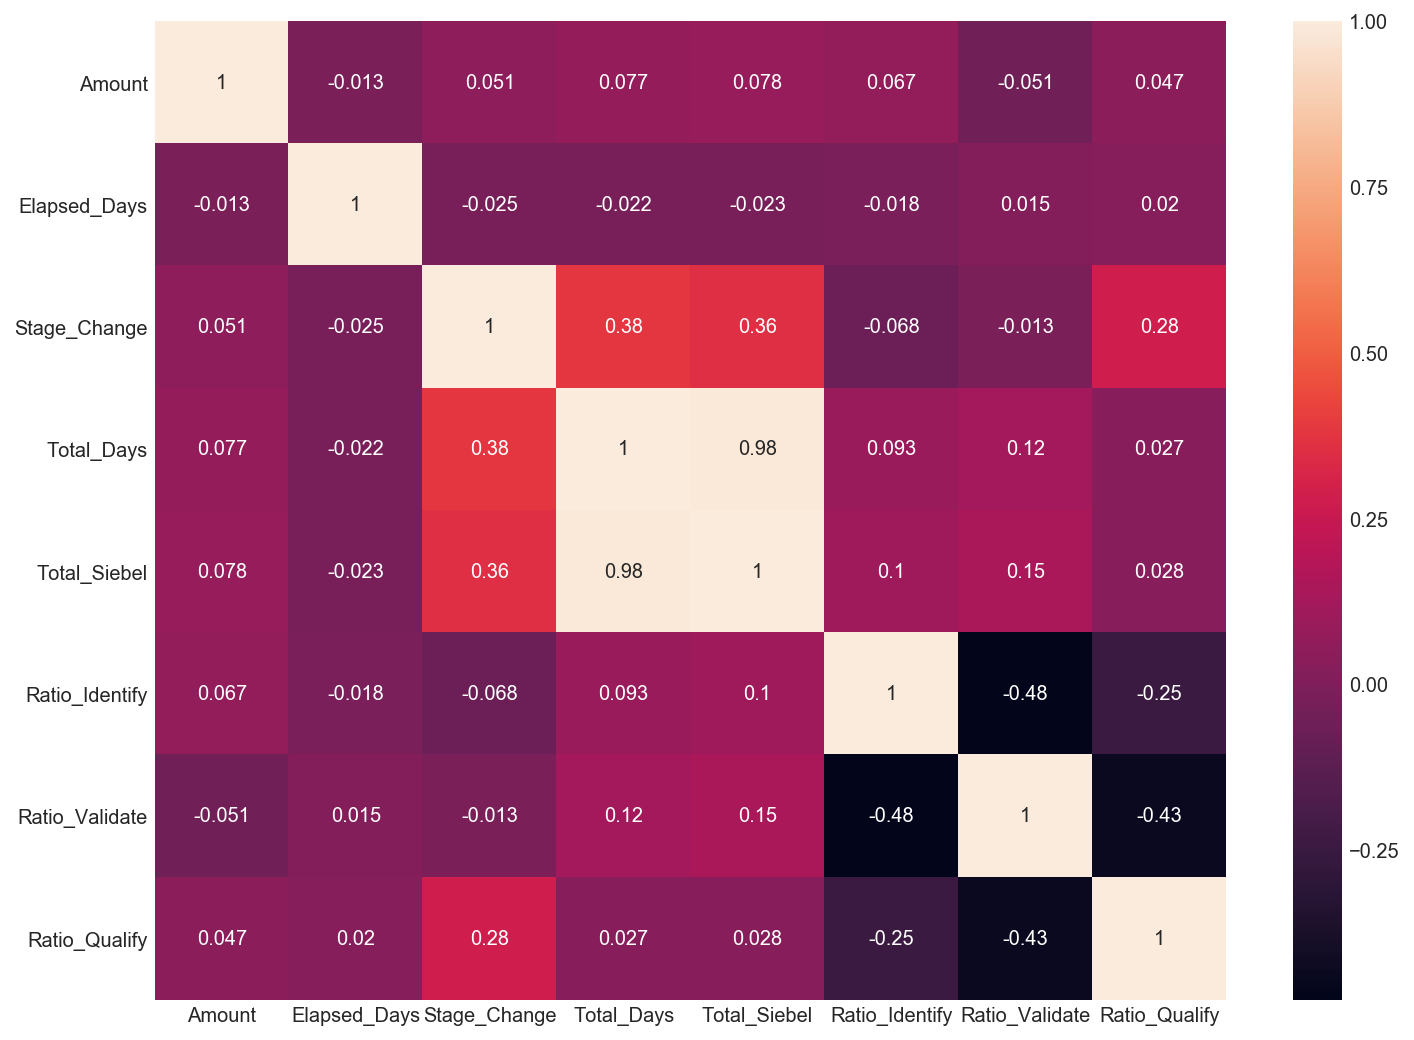

In [42]:
# Show correlation between numeric columns.

cars_corr = cars.corr()

plt.subplots(figsize=(12,9))
heatmap = sns.heatmap(cars_corr, annot=True)

Looking at the heatmap above, one thing that immediately stands out is the extremely high correlation between the Total_Days and Total_Siebel columns. This will have a negative impact on our models, therefore the Total_Siebal column will be dropped. The other numerical columns have a low to moderate correlation value, which are acceptable and no additional measures will be required.

Next, we will analyse the distribution of each of our features by plotting histograms for our numerical columns and bar charts for the categorial columns.

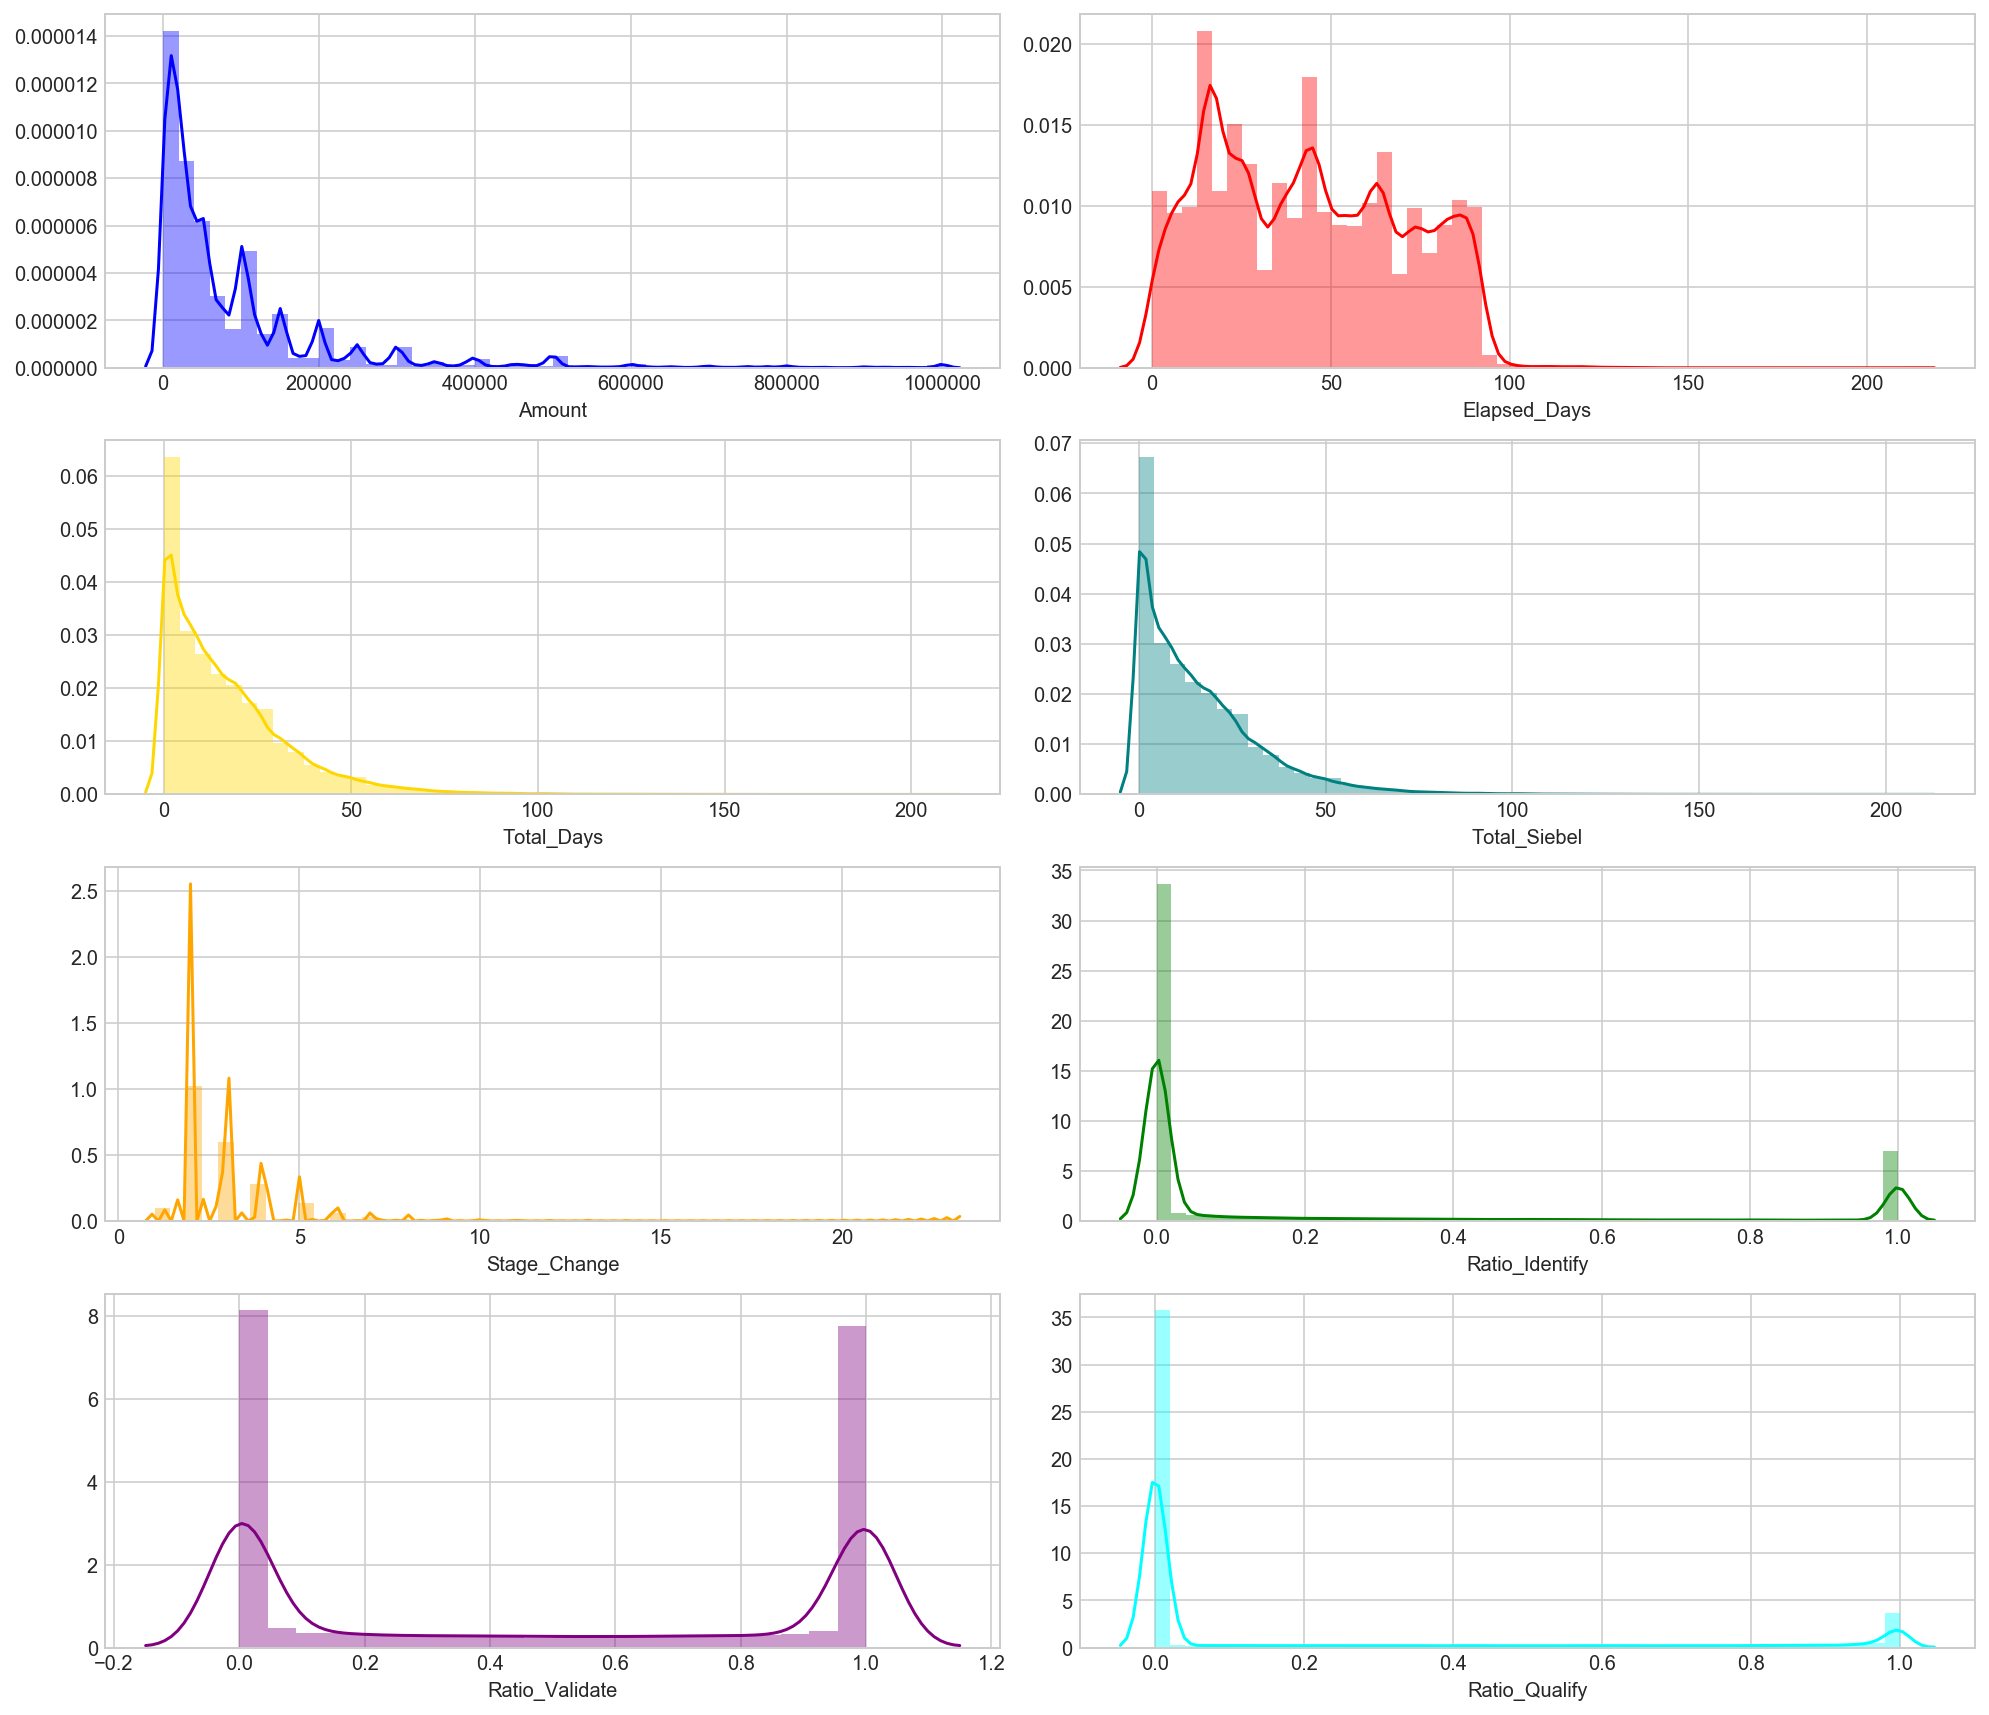

In [43]:
# Plot the distribution of numerical columns.

fig, axes = plt.subplots(4,2, figsize=(14,12))
sns.distplot(cars['Amount'], color='blue', ax=axes[0,0])
sns.distplot(cars['Elapsed_Days'], color='red', ax=axes[0,1])
sns.distplot(cars['Total_Days'], color='gold', ax=axes[1,0])
sns.distplot(cars['Total_Siebel'], color='teal', ax=axes[1,1])
sns.distplot(cars['Stage_Change'], color='orange', ax=axes[2,0])
sns.distplot(cars['Ratio_Identify'], color='green', ax=axes[2,1])
sns.distplot(cars['Ratio_Validate'], color='purple', ax=axes[3,0])
sns.distplot(cars['Ratio_Qualify'], color='cyan', ax=axes[3,1])
plt.tight_layout()

The plotted histograms show that the data in the almost all of the numerical columns have a  positively skewed distribution, with very few data points located on the right side. The 3 ratio columns represent data points that are located at both extreme ends of the scale and a minimal number in the middle.

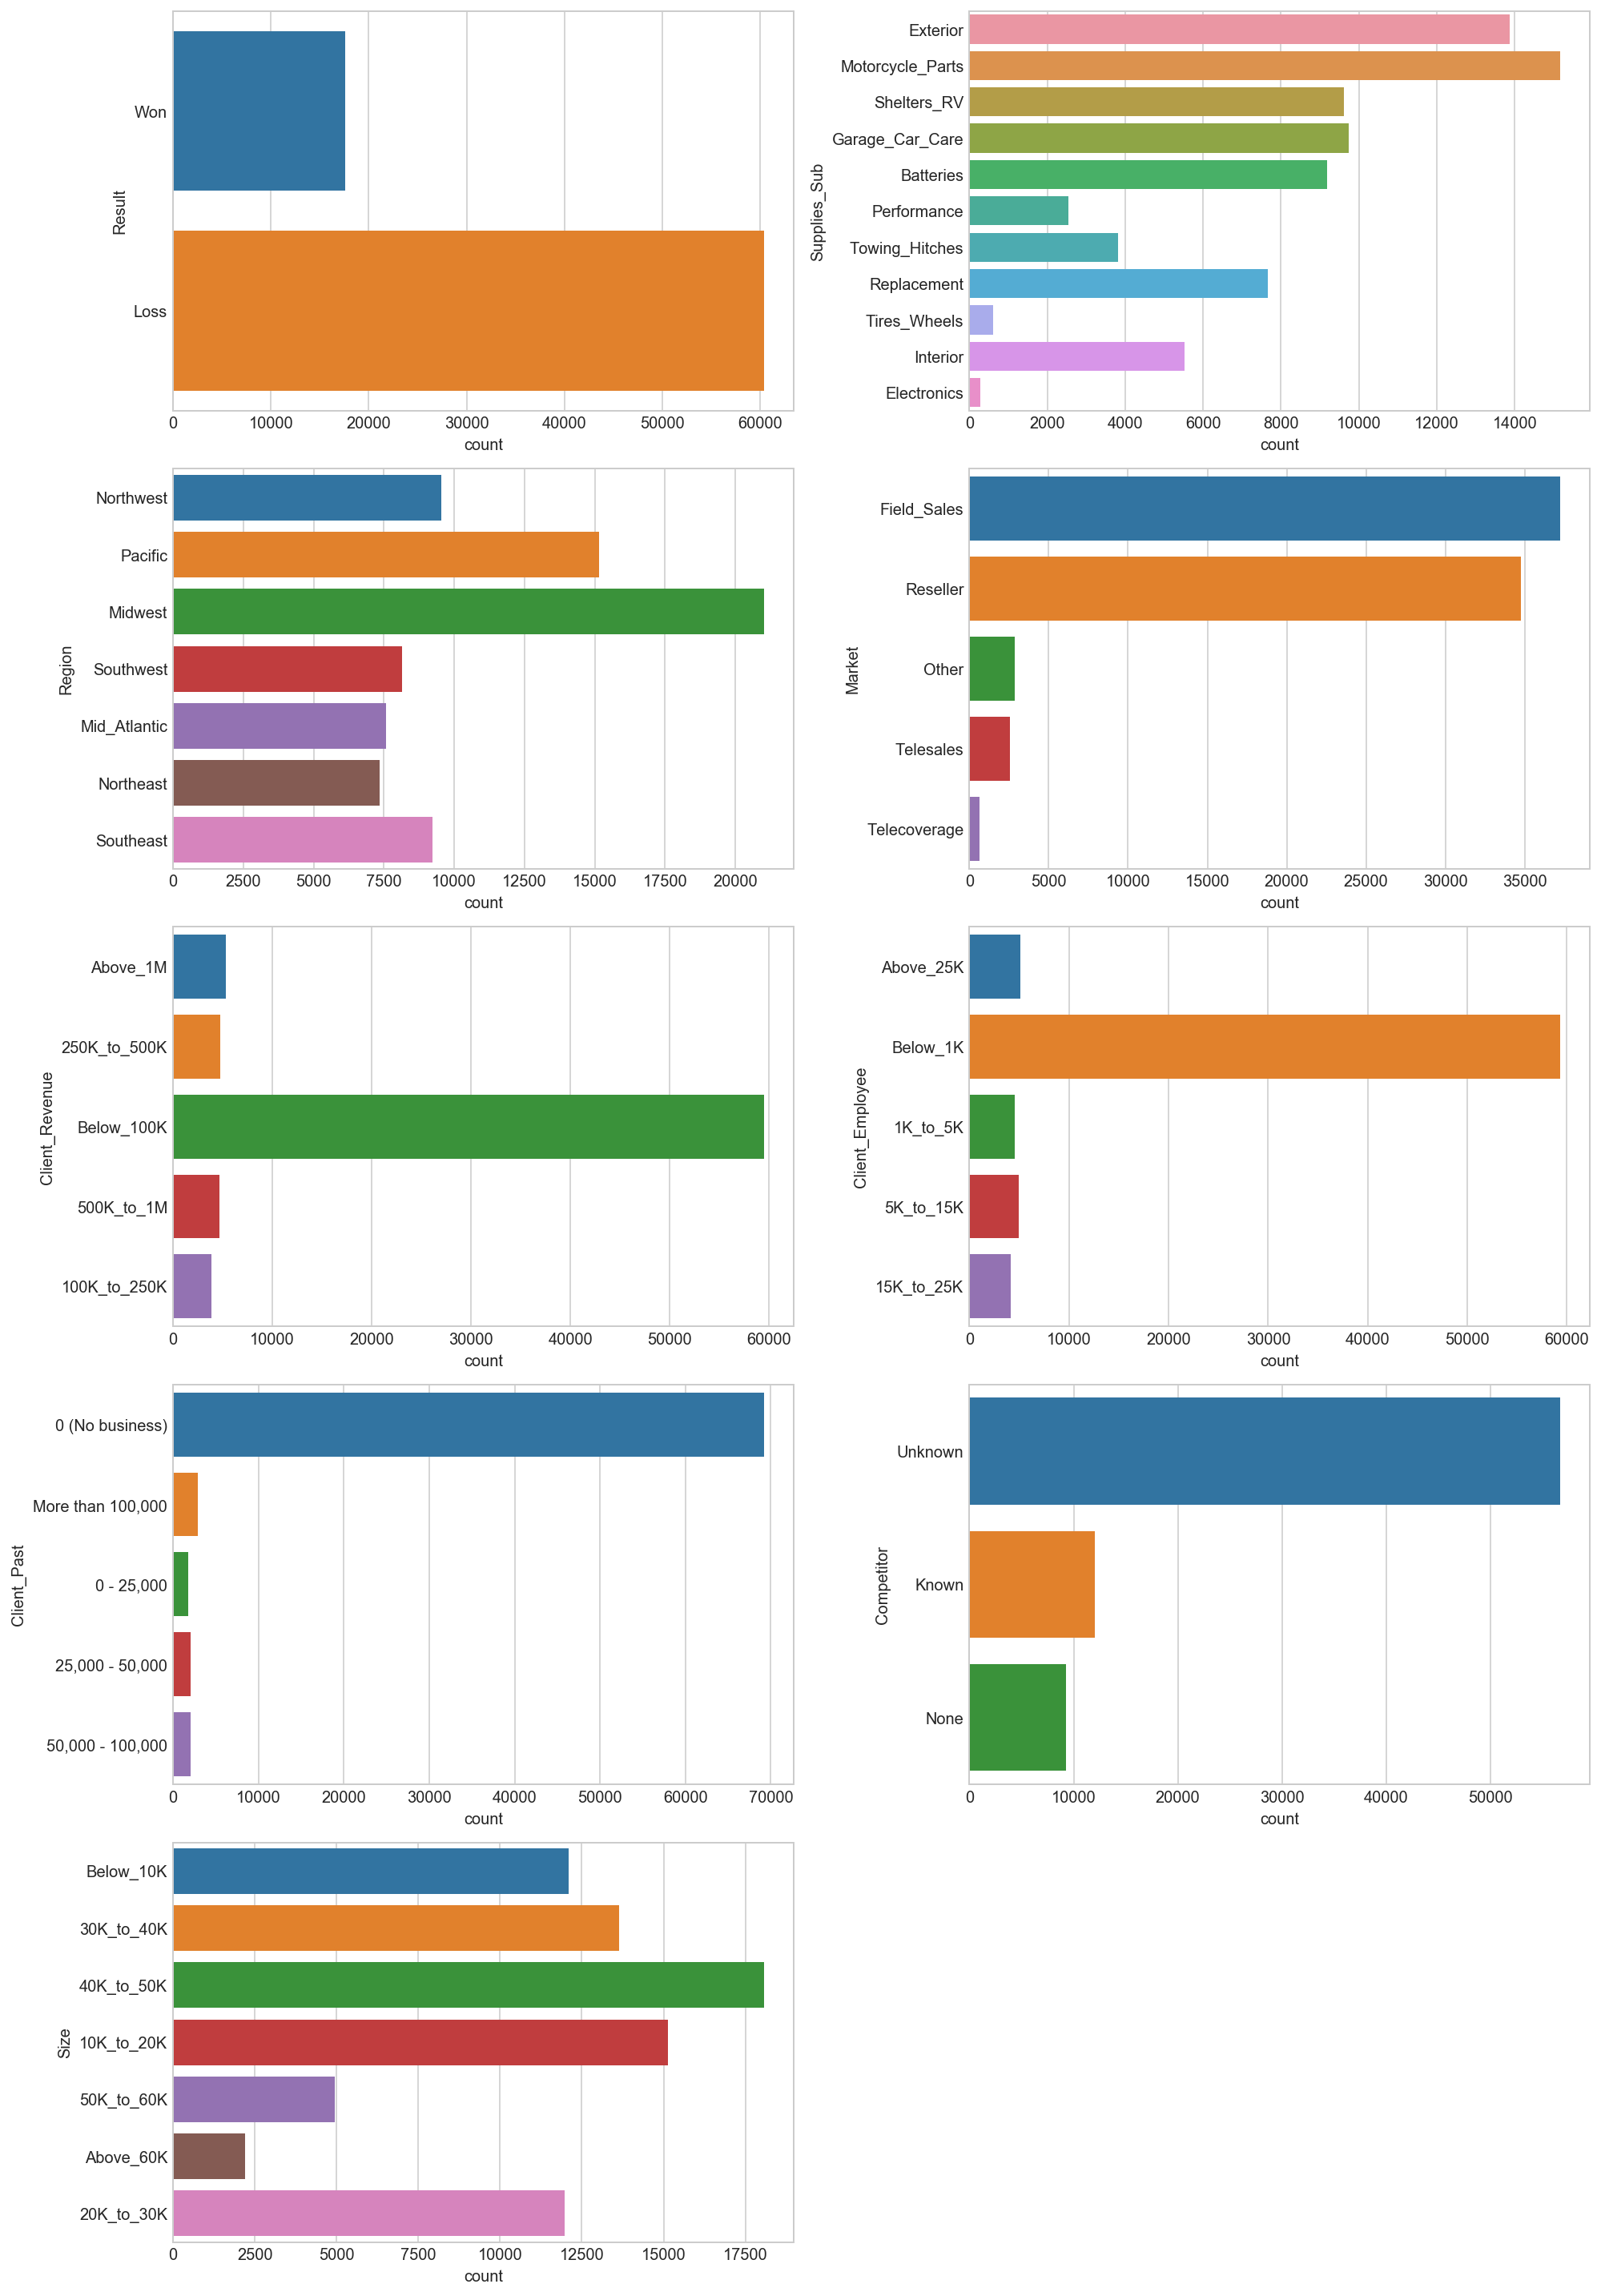

In [44]:
# Plot the distribution of categorical columns.

fig, axes = plt.subplots(5,2, figsize=(14,20))
sns.countplot(y=cars['Result'], ax=axes[0,0])
sns.countplot(y=cars['Supplies_Sub'], ax=axes[0,1])
sns.countplot(y=cars['Region'], ax=axes[1,0])
sns.countplot(y=cars['Market'], ax=axes[1,1])
sns.countplot(y=cars['Client_Revenue'], ax=axes[2,0])
sns.countplot(y=cars['Client_Employee'], ax=axes[2,1])
sns.countplot(y=cars['Client_Past'], ax=axes[3,0])
sns.countplot(y=cars['Competitor'], ax=axes[3,1])
sns.countplot(y=cars['Size'], ax=axes[4,0])
fig.delaxes(axes[4][1])
plt.tight_layout()

With regards to the categorical columns, we can see a decent distribution spread across all classes for the **Supplies_Sub**, **Region** and **Size** columns. However, the other features have a strong class imbalance distribution, with a single dominant class. Even our target feature **Result** has an imbalance where the majority class is about three times larger than the minority class. Class imbalance can have a negative impact on machine learning algorithms, and may result in predictive models that are biased and inaccurate. 

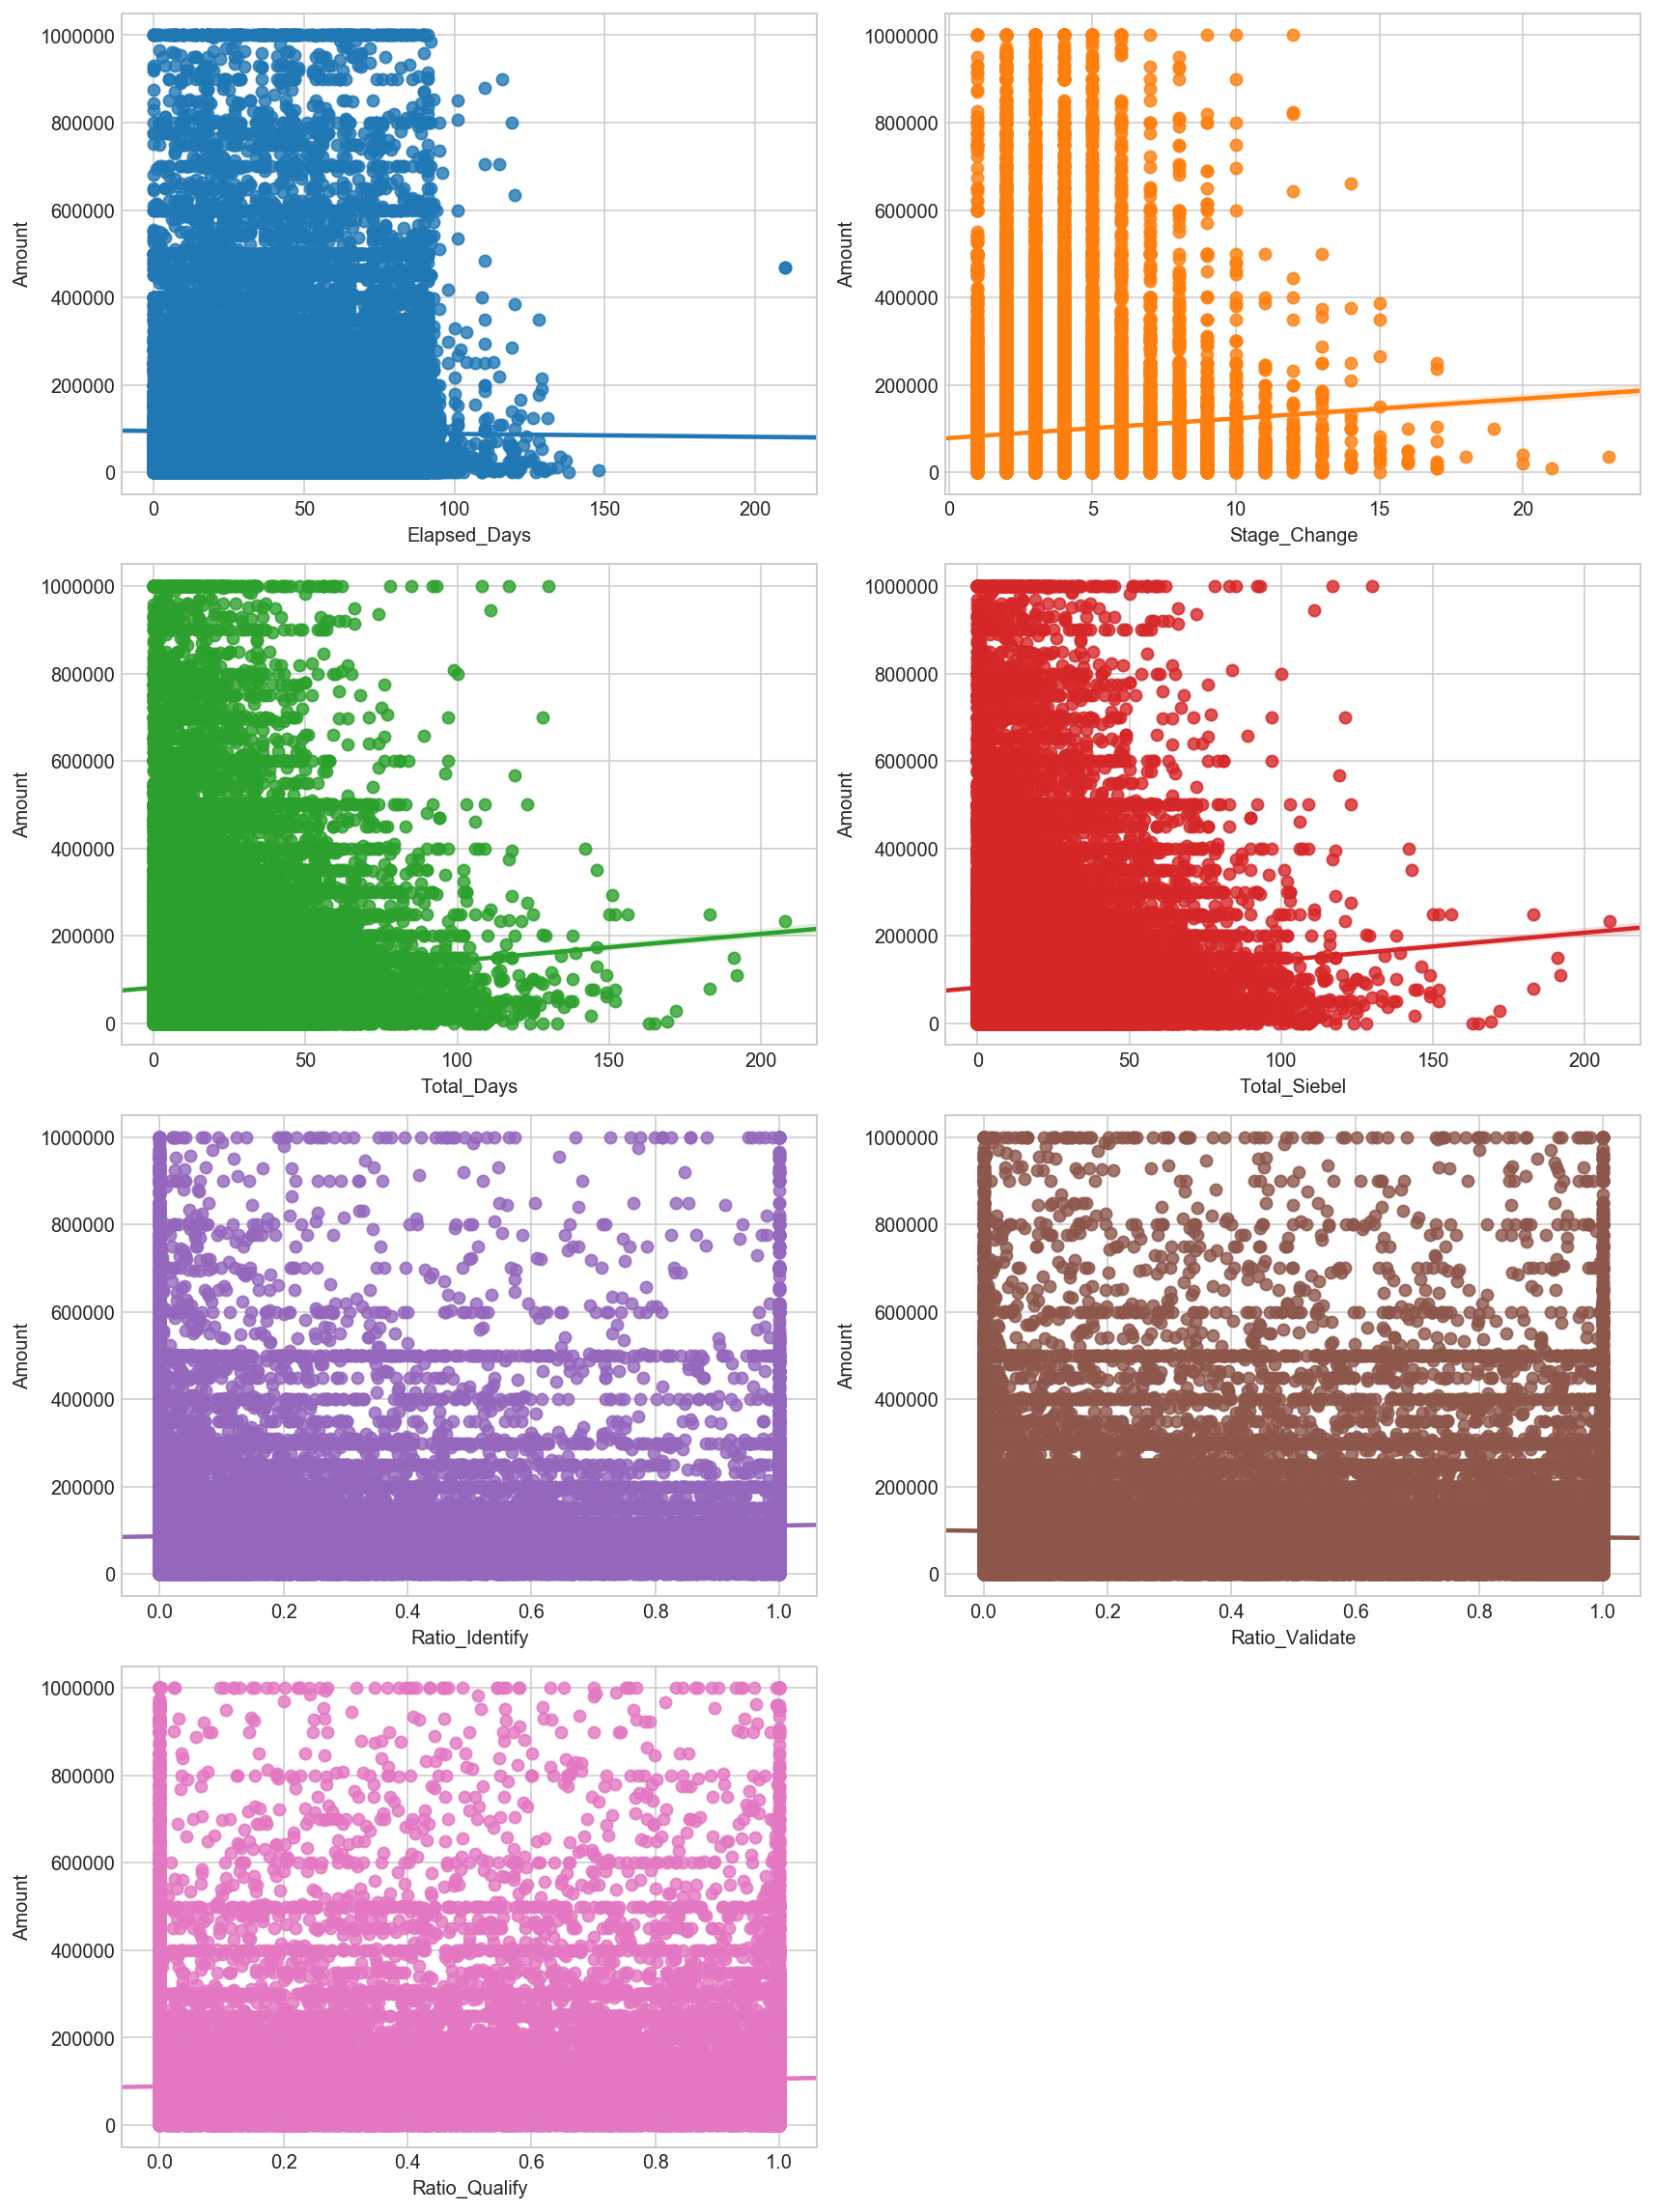

In [45]:
# Analyse the distribution of the target 'Amount' column against numerical columns.

fig, axes = plt.subplots(4,2, figsize=(12,16))
sns.regplot(x=cars['Elapsed_Days'], y=cars['Amount'], ax=axes[0,0])
sns.regplot(x=cars['Stage_Change'], y=cars['Amount'], ax=axes[0,1])
sns.regplot(x=cars['Total_Days'], y=cars['Amount'], ax=axes[1,0])
sns.regplot(x=cars['Total_Siebel'], y=cars['Amount'], ax=axes[1,1])
sns.regplot(x=cars['Ratio_Identify'], y=cars['Amount'], ax=axes[2,0])
sns.regplot(x=cars['Ratio_Validate'], y=cars['Amount'], ax=axes[2,1])
sns.regplot(x=cars['Ratio_Qualify'], y=cars['Amount'], ax=axes[3,0])
fig.delaxes(axes[3][1])
plt.tight_layout()

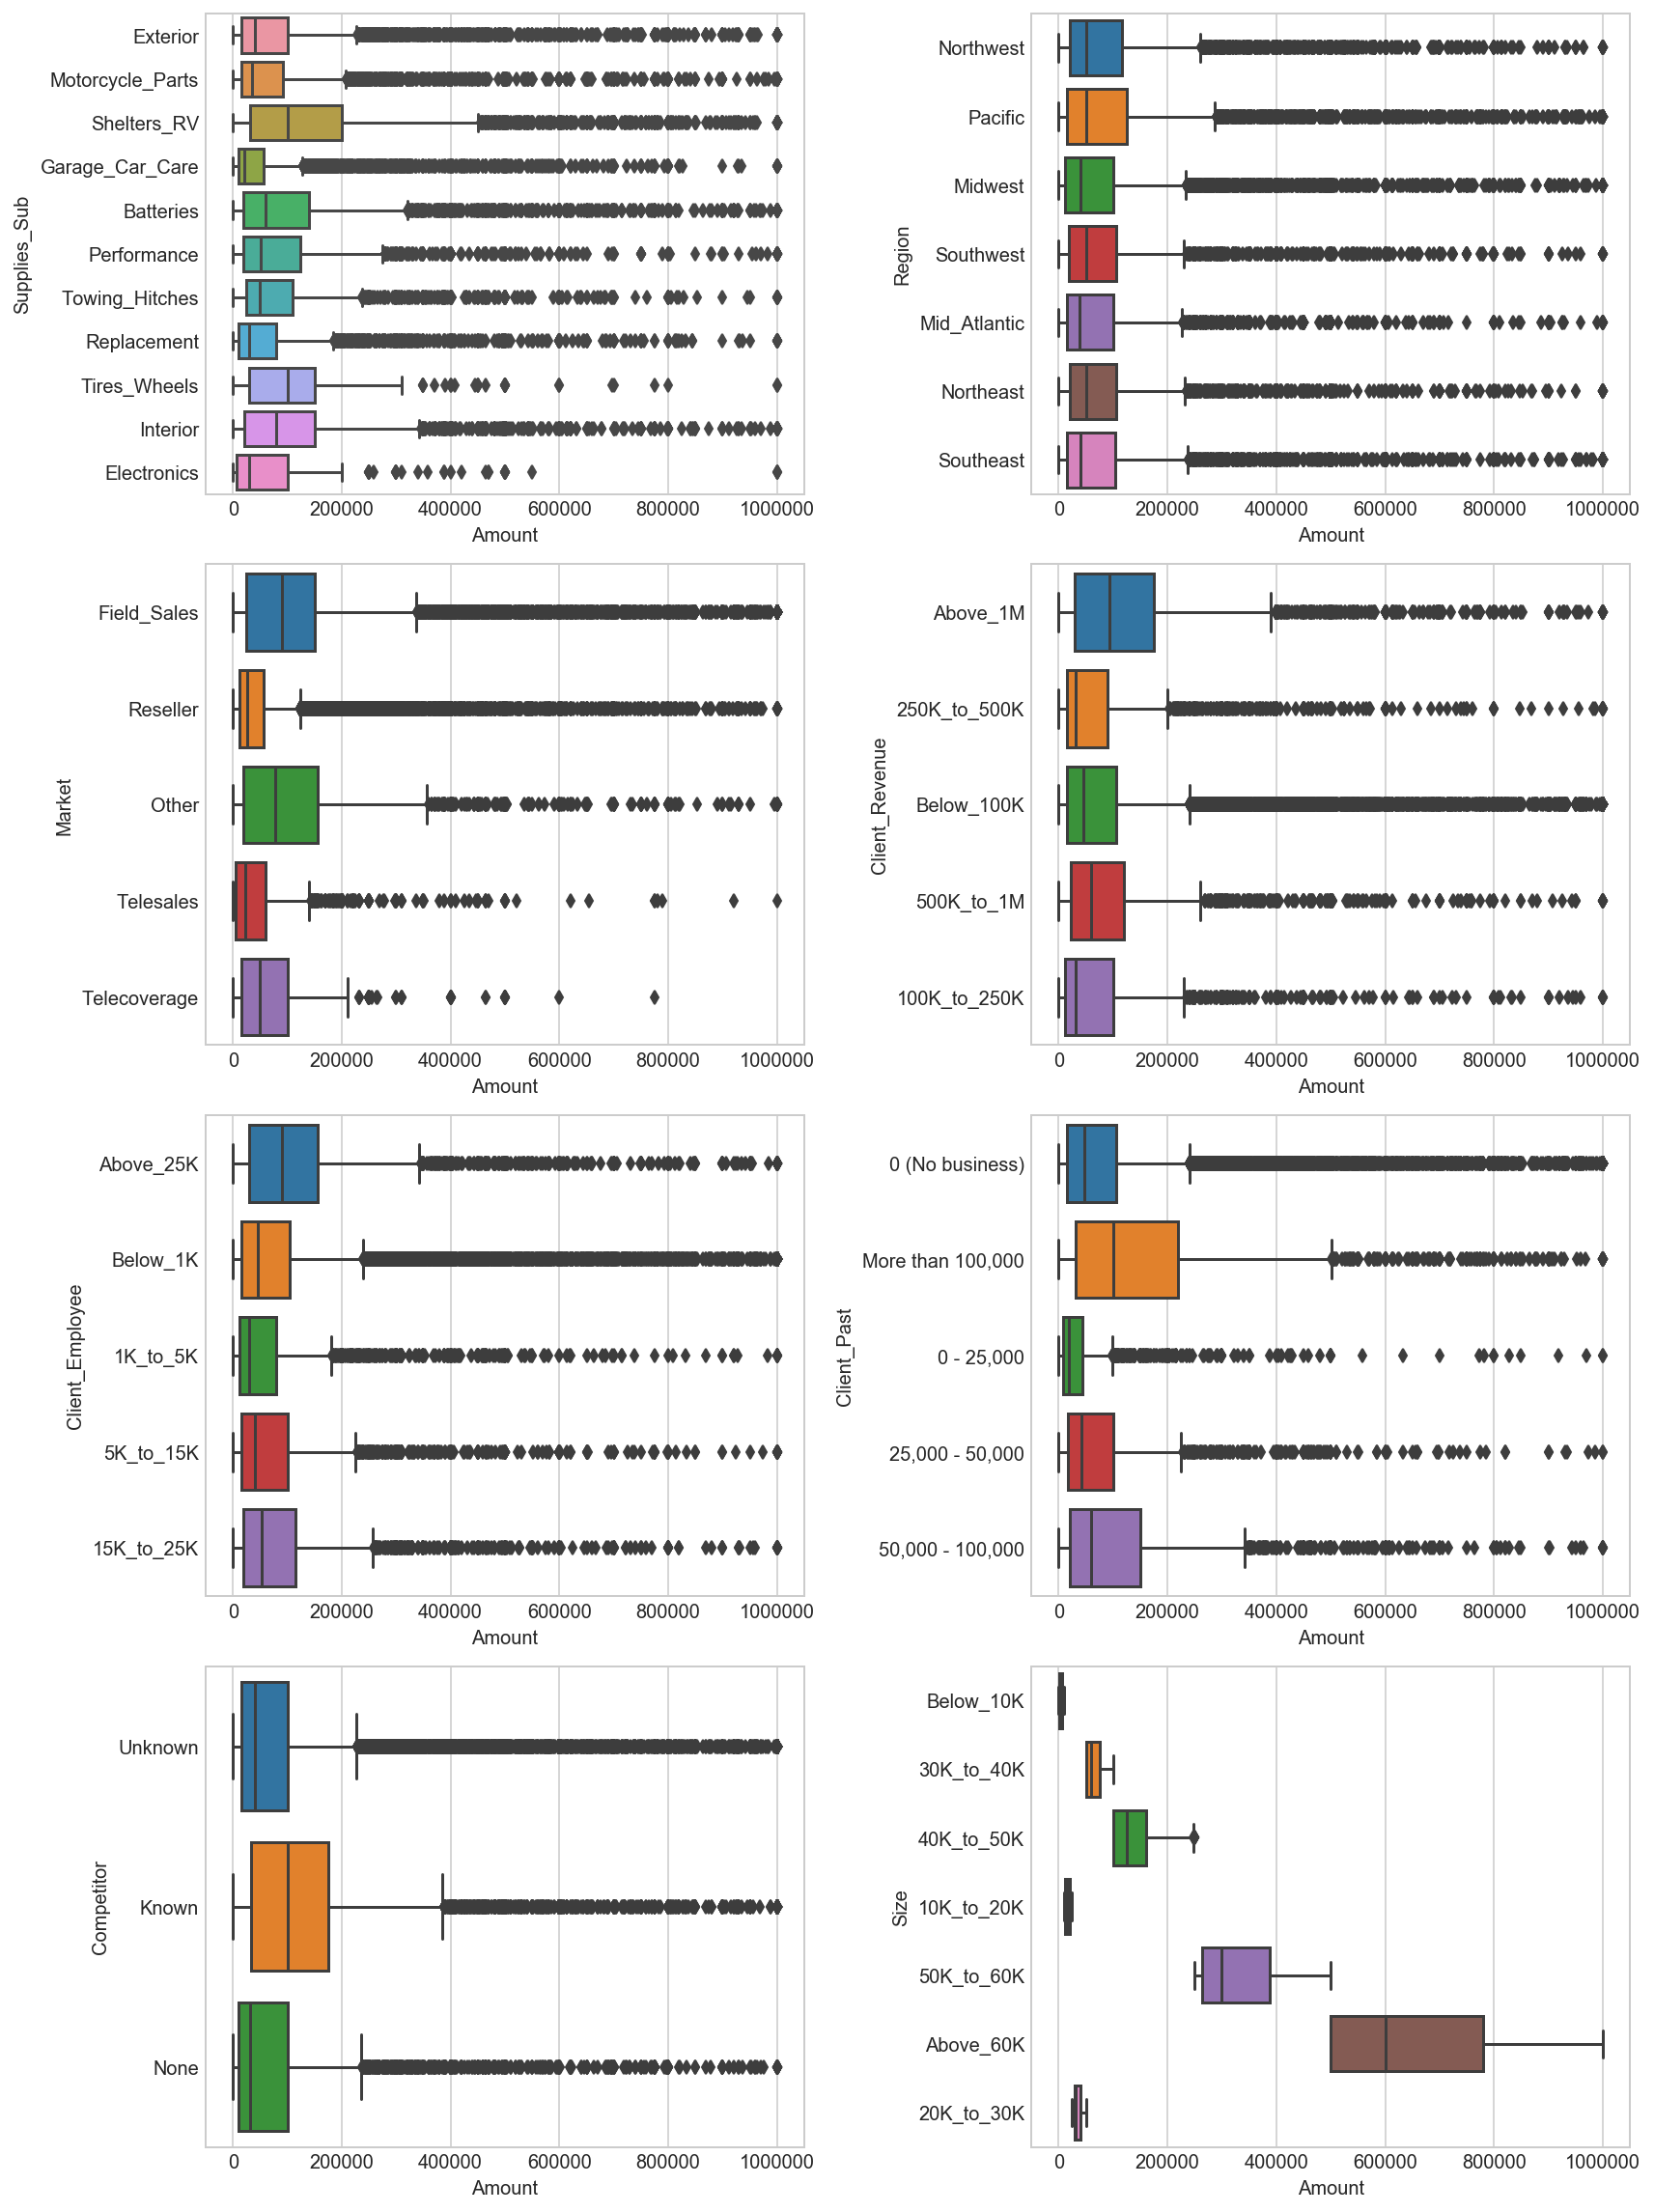

In [46]:
# Analyse the the distribution of target 'Amount' column against categorical columns.

fig, axes = plt.subplots(4,2, figsize=(12,16))
sns.boxplot(x=cars['Amount'], y=cars['Supplies_Sub'], ax=axes[0,0])
sns.boxplot(x=cars['Amount'], y=cars['Region'], ax=axes[0,1])
sns.boxplot(x=cars['Amount'], y=cars['Market'], ax=axes[1,0])
sns.boxplot(x=cars['Amount'], y=cars['Client_Revenue'], ax=axes[1,1])
sns.boxplot(x=cars['Amount'], y=cars['Client_Employee'], ax=axes[2,0])
sns.boxplot(x=cars['Amount'], y=cars['Client_Past'], ax=axes[2,1])
sns.boxplot(x=cars['Amount'], y=cars['Competitor'], ax=axes[3,0])
sns.boxplot(x=cars['Amount'], y=cars['Size'], ax=axes[3,1])
plt.tight_layout()

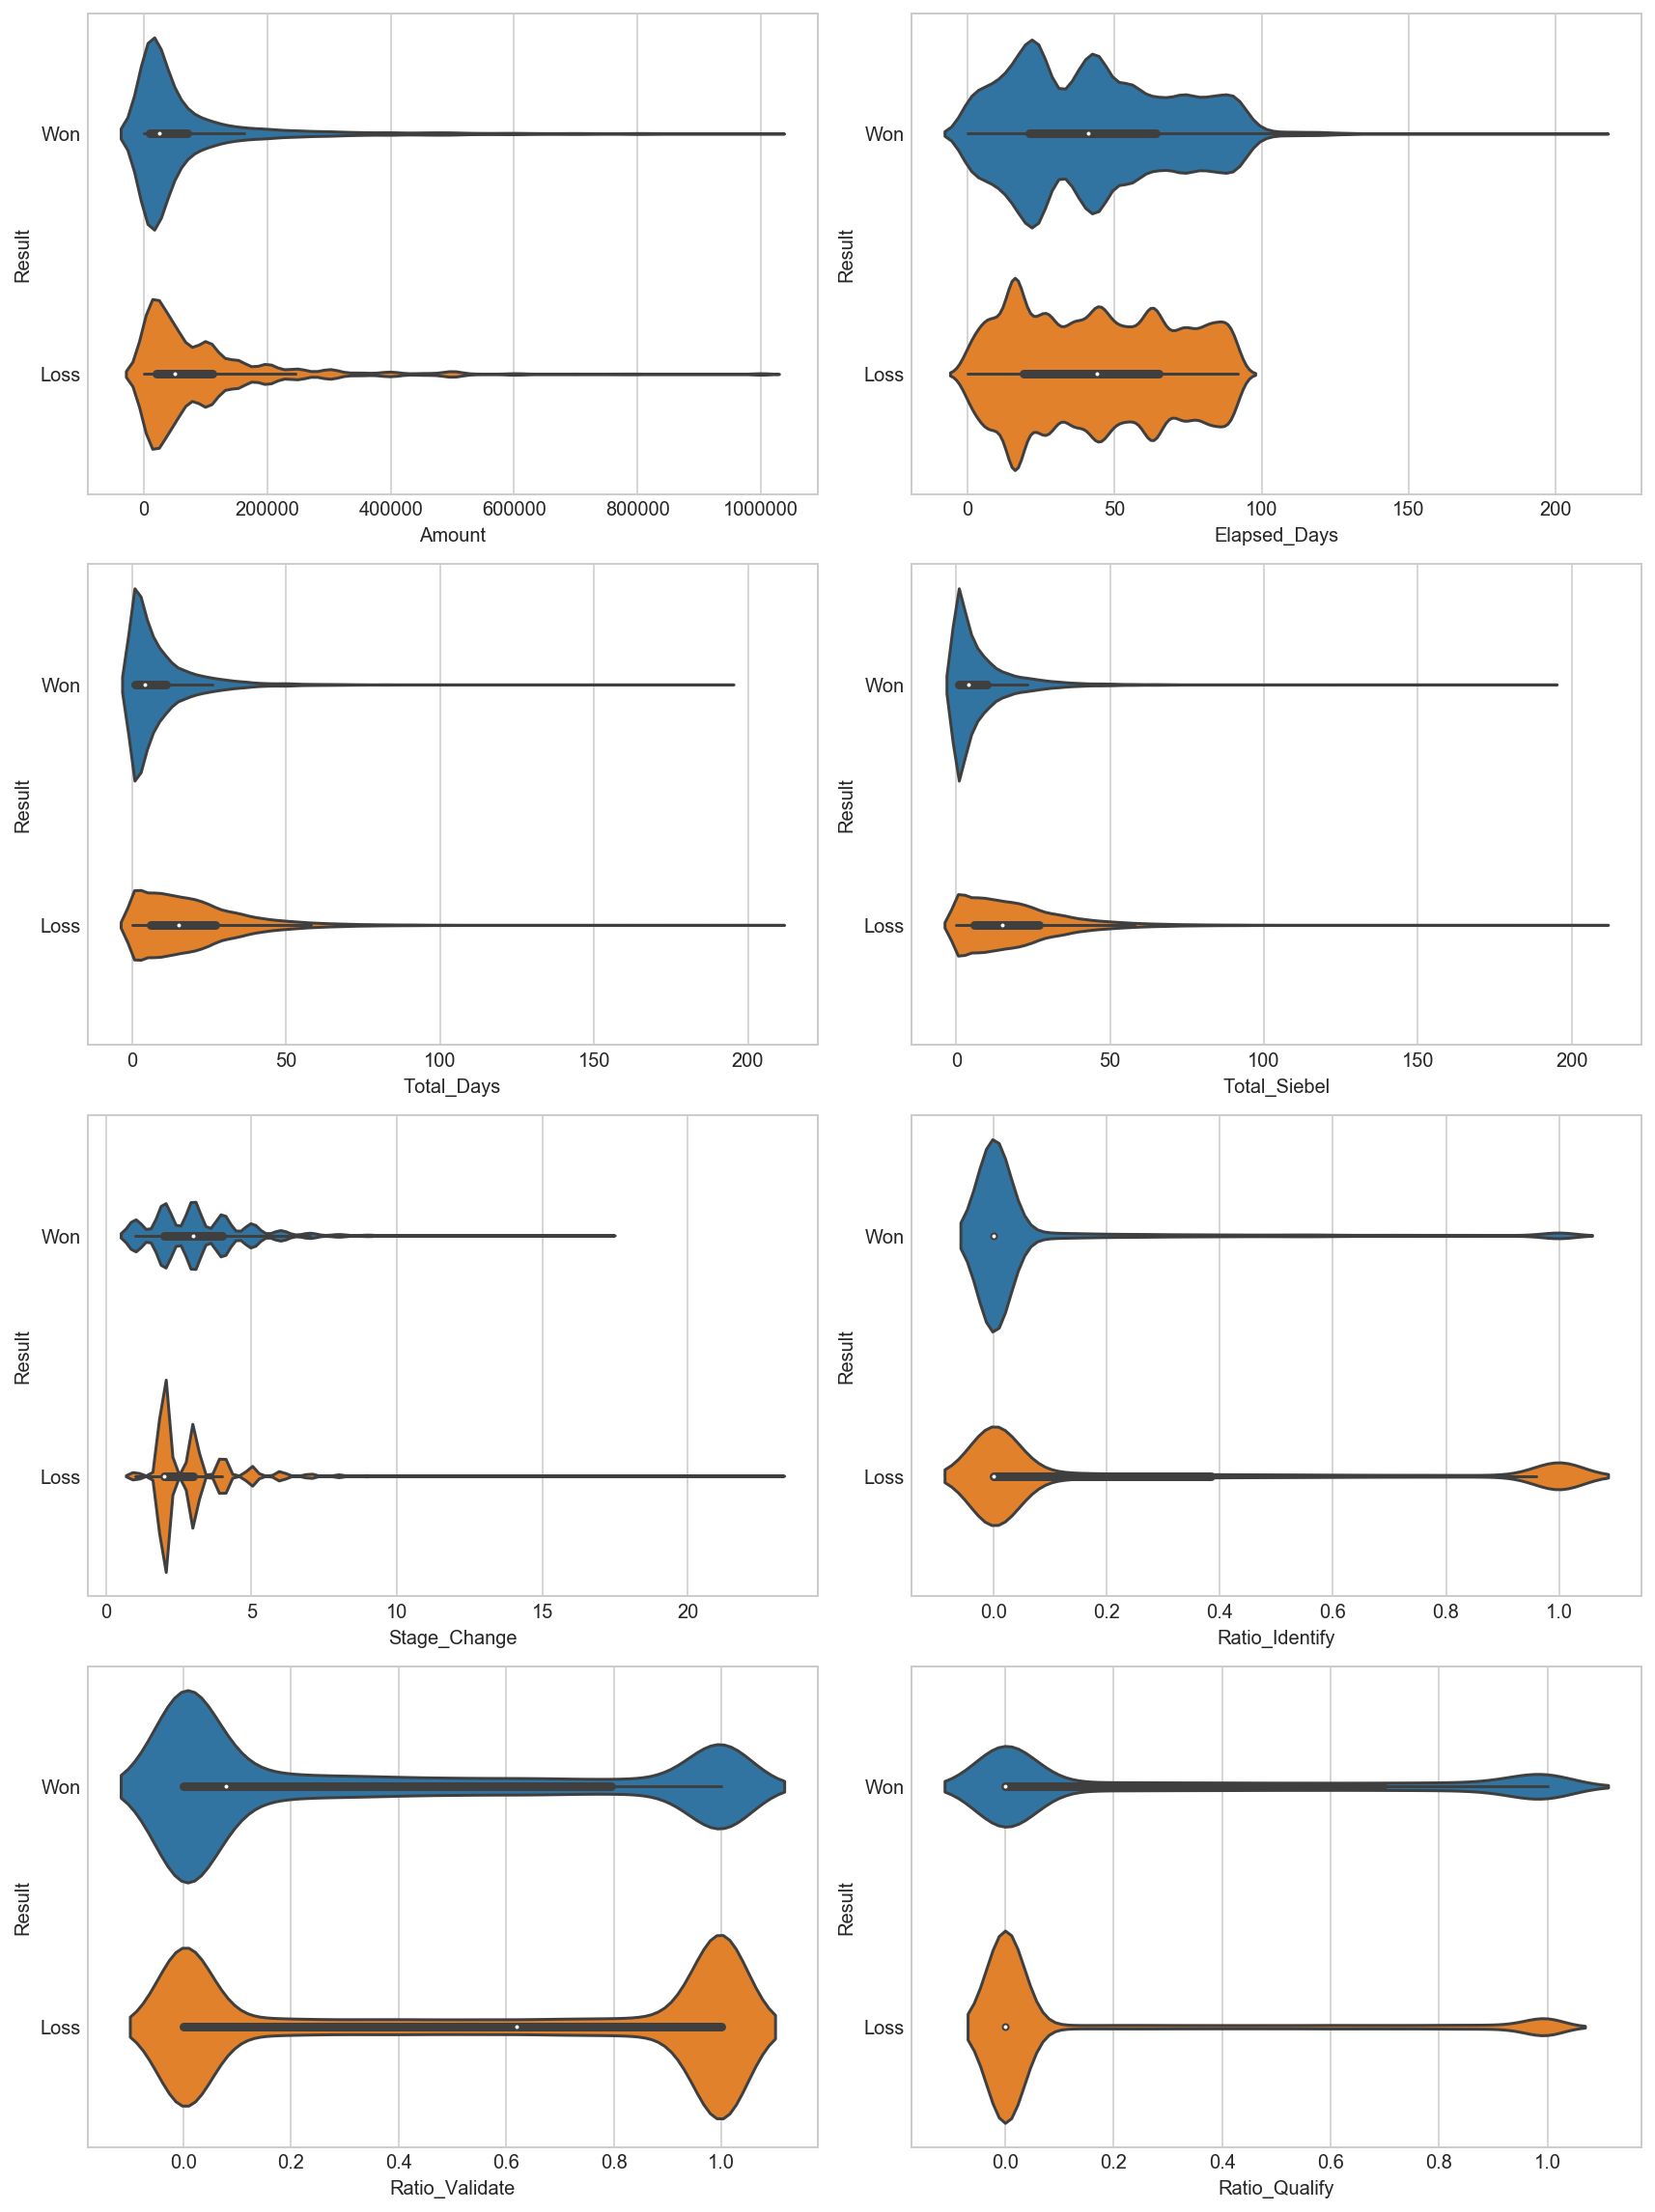

In [50]:
# Analyse the distribution of the target 'Result' column against numerical columns.

fig, axes = plt.subplots(4,2, figsize=(12,16))
sns.violinplot(x=cars['Amount'], y=cars['Result'], ax=axes[0,0])
sns.violinplot(x=cars['Elapsed_Days'], y=cars['Result'], ax=axes[0,1])
sns.violinplot(x=cars['Total_Days'], y=cars['Result'], ax=axes[1,0])
sns.violinplot(x=cars['Total_Siebel'], y=cars['Result'], ax=axes[1,1])
sns.violinplot(x=cars['Stage_Change'], y=cars['Result'], ax=axes[2,0])
sns.violinplot(x=cars['Ratio_Identify'], y=cars['Result'], ax=axes[2,1])
sns.violinplot(x=cars['Ratio_Validate'], y=cars['Result'], ax=axes[3,0])
sns.violinplot(x=cars['Ratio_Qualify'], y=cars['Result'], ax=axes[3,1])
plt.tight_layout()

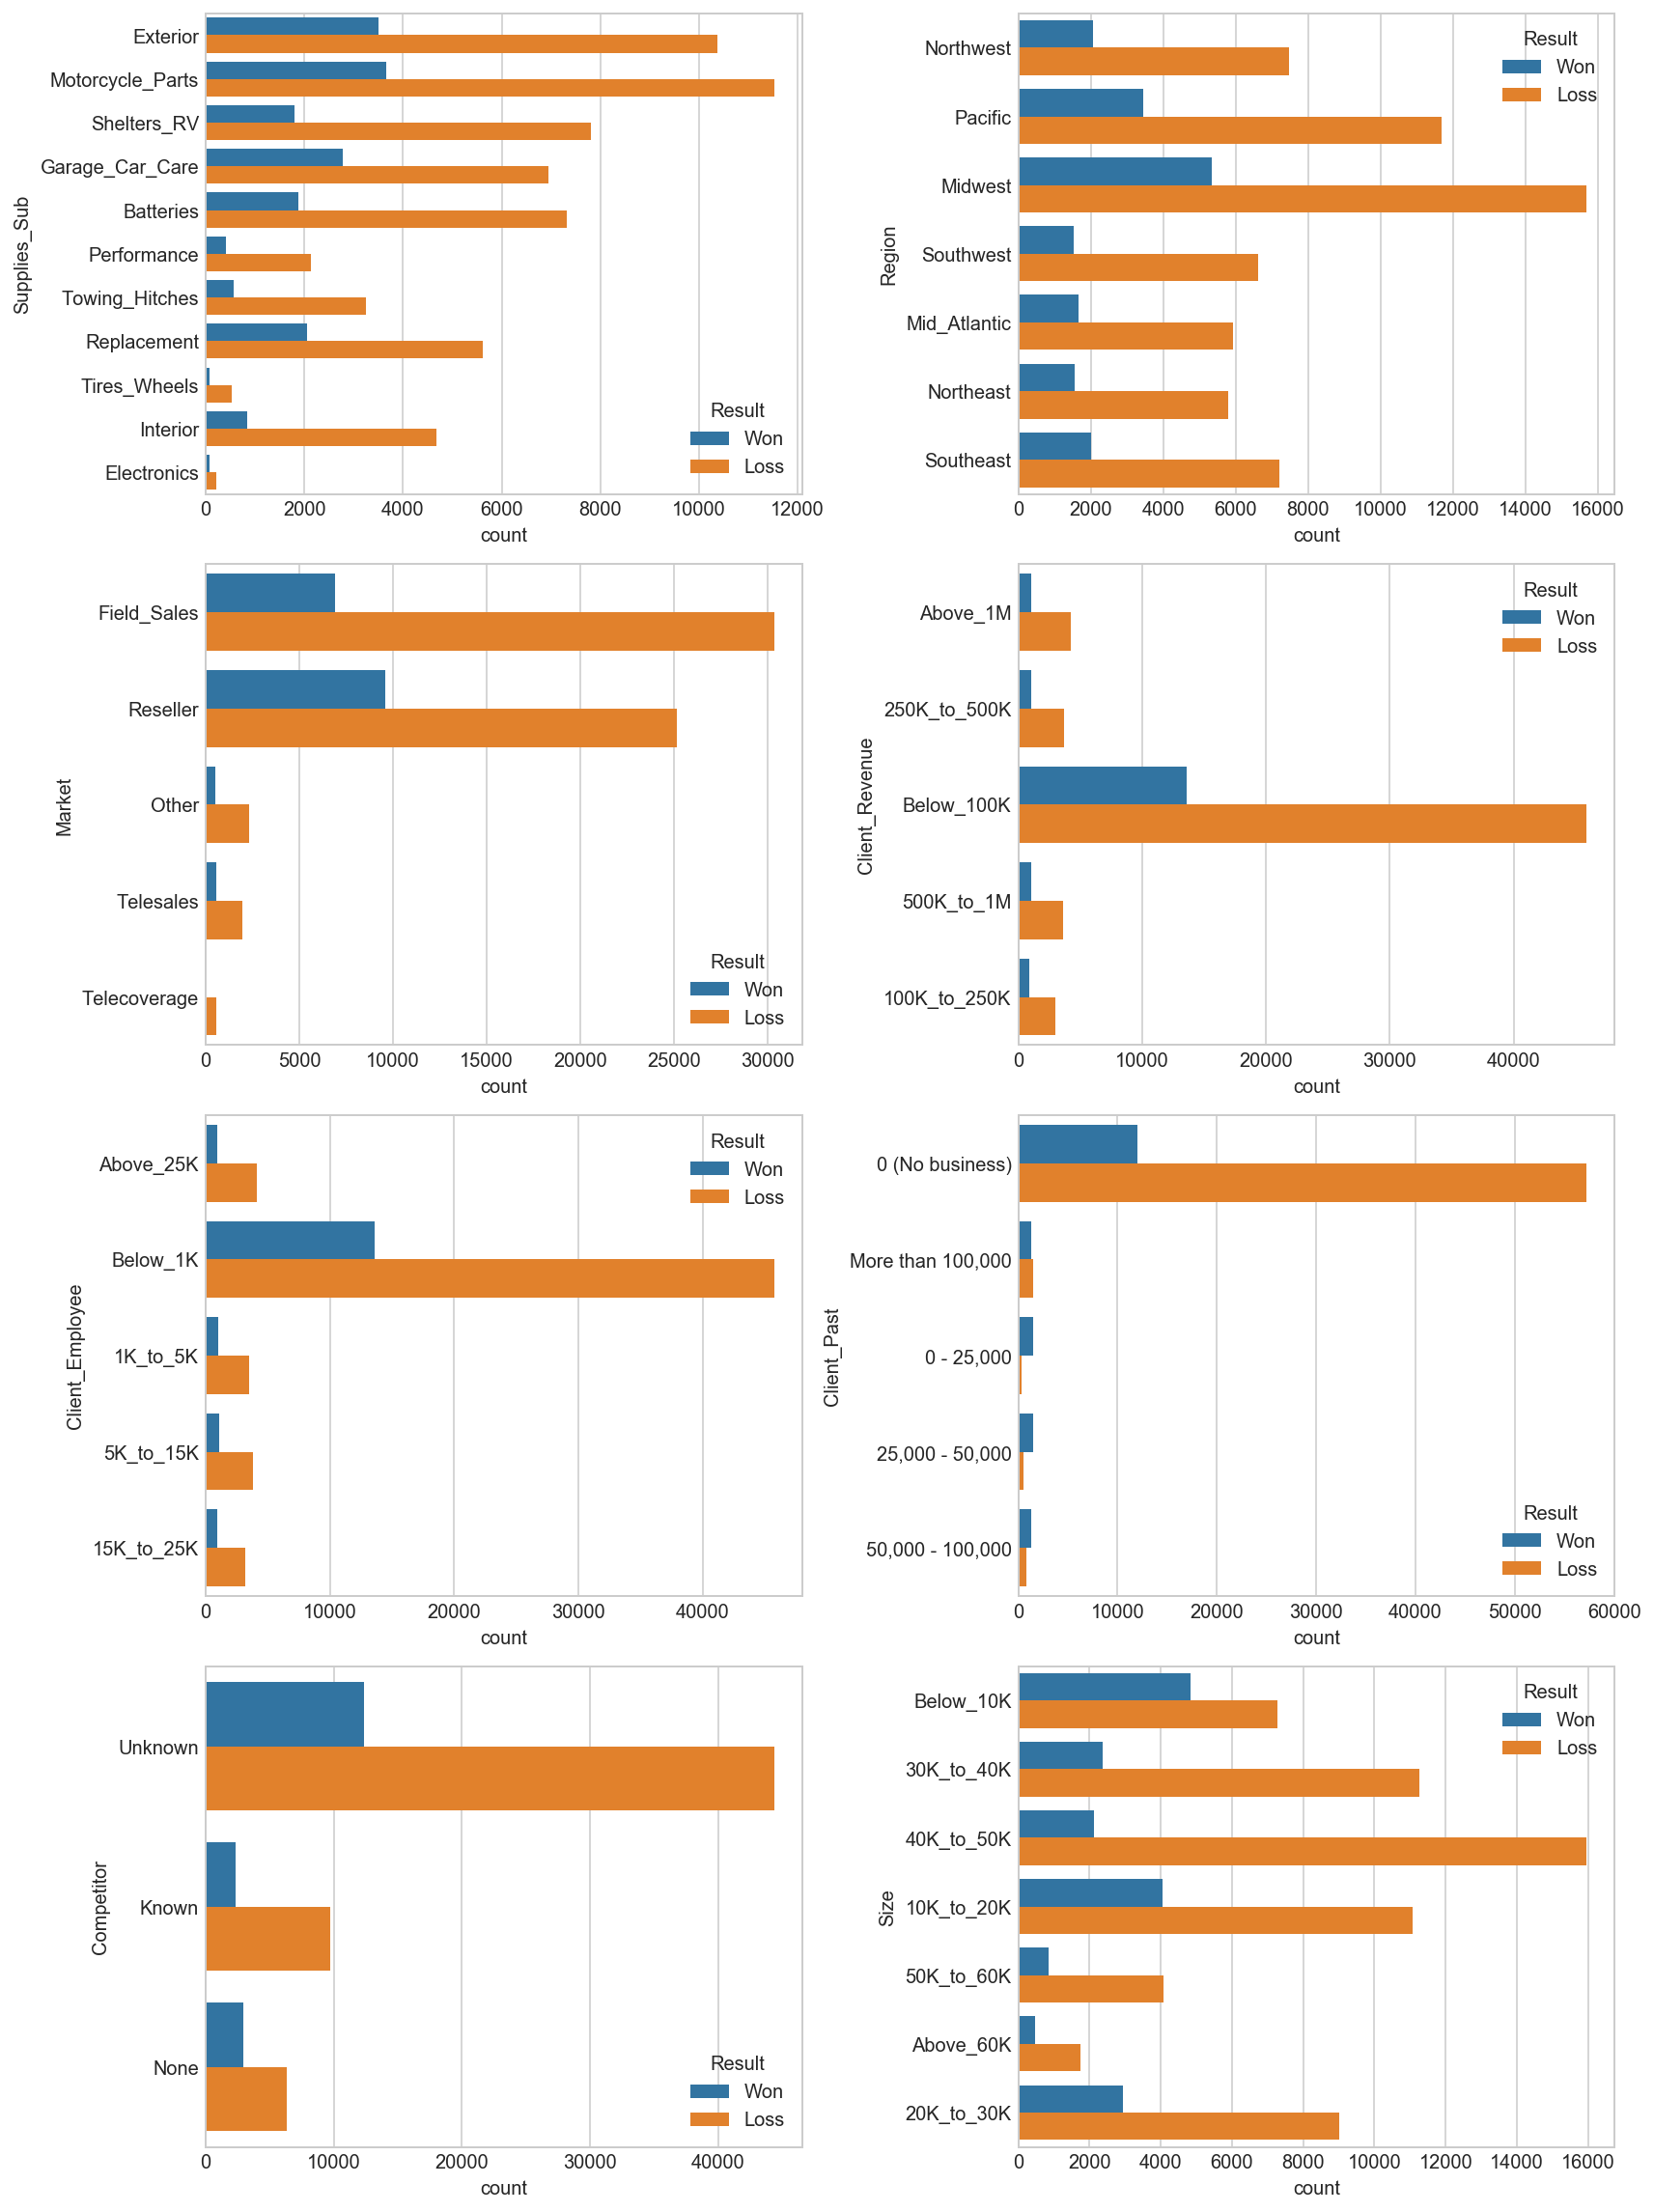

In [52]:
# Analyse the distribution of the target 'Result' column against categorical columns.

fig, axes = plt.subplots(4,2, figsize=(12,16))
sns.countplot(y=cars['Supplies_Sub'], hue=cars['Result'], ax=axes[0,0])
sns.countplot(y=cars['Region'], hue=cars['Result'], ax=axes[0,1])
sns.countplot(y=cars['Market'], hue=cars['Result'], ax=axes[1,0])
sns.countplot(y=cars['Client_Revenue'], hue=cars['Result'], ax=axes[1,1])
sns.countplot(y=cars['Client_Employee'], hue=cars['Result'], ax=axes[2,0])
sns.countplot(y=cars['Client_Past'], hue=cars['Result'], ax=axes[2,1])
sns.countplot(y=cars['Competitor'], hue=cars['Result'], ax=axes[3,0])
sns.countplot(y=cars['Size'], hue=cars['Result'], ax=axes[3,1])
plt.tight_layout()

# Feature Engineering
The next step requires making some changes to our existing features. We will begin by converting the values in our target column **Result** into binary values.

The classes in the **Client_Past** columns are also changed. The data is grouped into 2 classes to identify if the opportunity is from a new client or existing client, rather than separating into 5 classes.

In [53]:
# Change values of 'Result' column to binary.
# Reduce the number of categories in 'Client_Past' column to 2 (0 = new client, 1 = existing client).

cars['Result'] = cars['Result'].map(lambda x: 0 if x == 'Loss' else 1)
cars['Client_Past'] = cars['Client_Past'].map(lambda x: 0 if x == '0 (No business)' else 1)

Comparing the **Supplies** and **Supplies_Sub** columns, we can see that **Supplies_Sub** actually is more detailed and provides a clearer picture as compared to **Supplies**. Therefore, the **Supplies** column will be dropped.

In [54]:
# 'Supplies_Sub' column provides a clearer picture compared to 'Supplies' column

cars.groupby('Supplies').Supplies_Sub.value_counts()

Supplies      Supplies_Sub    
Accessories   Exterior            13876
              Garage_Car_Care      9733
              Batteries            9192
              Replacement          7666
              Interior             5524
              Towing_Hitches       3818
Electronics   Electronics           281
Performance   Motorcycle_Parts    15174
              Shelters_RV          9606
              Performance          2545
Tires_Wheels  Tires_Wheels          609
Name: Supplies_Sub, dtype: int64

The **Total_Siebel** column was previously showly to be highly correlated to the **Total_Days** column, so that too will be removed.

In [55]:
# Drop 'Total_Siebel' column due to high correlation with 'Total_Days' column.
# Drop 'Supplies' column since 'Supplies_Sub' is more detailed.

cars2 = cars.drop(['Total_Siebel', 'Supplies'], axis=1)

In [56]:
# Create dummy variables for categorical columns.

cat_dummy = pd.get_dummies(cars2[cat_columns], drop_first=True)
print cat_dummy.shape
cat_dummy.head()

(78024, 38)


,Result,Client_Past,Supplies_Sub_Electronics,Supplies_Sub_Exterior,Supplies_Sub_Garage_Car_Care,Supplies_Sub_Interior,Supplies_Sub_Motorcycle_Parts,Supplies_Sub_Performance,Supplies_Sub_Replacement,Supplies_Sub_Shelters_RV,Supplies_Sub_Tires_Wheels,Supplies_Sub_Towing_Hitches,Region_Midwest,Region_Northeast,Region_Northwest,Region_Pacific,Region_Southeast,Region_Southwest,Market_Other,Market_Reseller,Market_Telecoverage,Market_Telesales,Client_Revenue_250K_to_500K,Client_Revenue_500K_to_1M,Client_Revenue_Above_1M,Client_Revenue_Below_100K,Client_Employee_1K_to_5K,Client_Employee_5K_to_15K,Client_Employee_Above_25K,Client_Employee_Below_1K,Competitor_None,Competitor_Unknown,Size_20K_to_30K,Size_30K_to_40K,Size_40K_to_50K,Size_50K_to_60K,Size_Above_60K,Size_Below_10K
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0


Due to the number of categorical features in our dataset, we will utilize pandas' **get_dummies** function to create 38 new dummy variables to replace the original categorical columns. This new set of dummy variables can be then concatenated with the original dataset to create a new dataset which we will use in our predictions.

In [57]:
# Combine original dataset with new dummy variables.
# Drop old categorical columns.

print cars2.shape
cars2.drop(cat_columns, axis=1, inplace=True)
print cars2.shape
cars2 = pd.concat([cars2, cat_dummy], axis=1)
print cars2.shape
cars2.head()

(78024, 16)
(78024, 7)
(78024, 45)


,Amount,Elapsed_Days,Stage_Change,Total_Days,Ratio_Identify,Ratio_Validate,Ratio_Qualify,Result,Client_Past,Supplies_Sub_Electronics,Supplies_Sub_Exterior,Supplies_Sub_Garage_Car_Care,Supplies_Sub_Interior,Supplies_Sub_Motorcycle_Parts,Supplies_Sub_Performance,Supplies_Sub_Replacement,Supplies_Sub_Shelters_RV,Supplies_Sub_Tires_Wheels,Supplies_Sub_Towing_Hitches,Region_Midwest,Region_Northeast,Region_Northwest,Region_Pacific,Region_Southeast,Region_Southwest,Market_Other,Market_Reseller,Market_Telecoverage,Market_Telesales,Client_Revenue_250K_to_500K,Client_Revenue_500K_to_1M,Client_Revenue_Above_1M,Client_Revenue_Below_100K,Client_Employee_1K_to_5K,Client_Employee_5K_to_15K,Client_Employee_Above_25K,Client_Employee_Below_1K,Competitor_None,Competitor_Unknown,Size_20K_to_30K,Size_30K_to_40K,Size_40K_to_50K,Size_50K_to_60K,Size_Above_60K,Size_Below_10K
0,0,76,13,104,0.69636,0.113985,0.154215,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
1,0,63,2,163,0.00000,1.000000,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
2,7750,24,7,82,1.00000,0.000000,0.000000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
3,0,16,5,124,1.00000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,69756,69,11,91,0.00000,0.141125,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0


In [58]:
# # Create pickle file.

# import pickle

# pickle_out = open("cars2.pickle","wb")
# pickle.dump(cars2, pickle_out)
# pickle_out.close()

With this new dataset, we are now ready to commence building our predictive models.